In [2]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

def date2int(date_obj):
    string = str(date_obj)
    return int("".join(string.split(" ")[0].split("-")))

def delete_zero(df):
    for i in df:
        df[i] = df[i].fillna(0)
        if (df[i] == 0).all():
            del df[i]
    return df

E:\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def optimize(y, x, learn_rate, criteria):
    w = np.random.rand(x.shape[1], 1)
    last_loss = 0.0
    loss = criteria + last_loss
    while abs(loss - last_loss) >= criteria:
        gradient = 2 * x.T.dot(x).dot(w) - 2 * x.T.dot(y)
        w = w - gradient * learn_rate
        # w[w < 0.0] = 0.0
        last_loss = loss
        loss = sum(y - x.dot(w))
    return w

def PCA(x, percent=0.8):
    x_mean = x.mean(axis=1)
    x_mean.shape = (-1, 1)
    x -= x_mean
    x2 = x.T.dot(x)
    eig_val, eig_vec = np.linalg.eig(x2)
    print eig_vec[:, 0]
    this_percnet = 0.0
    K = 1
    while True:
        max_index = np.argpartition(eig_val, -K)[-K:]
        if sum(eig_val[max_index]) >= sum(eig_val) * percent:
            break
        else:
            K += 1
    transfer_mat = eig_vec[:, max_index]
    x3 = x.dot(transfer_mat)
    return x3, transfer_mat

In [4]:
df_cta = pd.read_excel("./Data/cta_raw.xlsx", sheet_name="cta").iloc[:, :2]
df_cta["date"] = df_cta["date"].apply(date2int)
df_cta["NPV"] = df_cta["NPV"].pct_change()
df_5_13 = pd.read_excel("./Data/cta_raw.xlsx", sheet_name="5-13")
df_10_20 = pd.read_excel("./Data/cta_raw.xlsx", sheet_name="10-20")
df_20_50 = pd.read_excel("./Data/cta_raw.xlsx", sheet_name="20-50")
df_50_100 = pd.read_excel("./Data/cta_raw.xlsx", sheet_name="50-100")

first, we need to concate df_cta with df_myself

In [5]:
def prepare_data_and_plot(df, df_name, portion=1, save=False, learn_rate=1e-12, stop_rate=1e-11):
    df = delete_zero(df)
    df_concated = pd.merge(df_cta, df, on="date", how="left").dropna()
    df_concated.iloc[:, 2:] = df_concated.iloc[:, 2:] / 1e7
    
    date = df_concated.iloc[:, 0].values
    y = df_concated.iloc[:, 1].values
    y.shape = (-1, 1)
    x = df_concated.iloc[:, 2:].values
    x2, transfer_mat = PCA(x)

    w = optimize(y, x2, learn_rate, stop_rate)
    y_estimate = x2.dot(w)
    
    fig2 = plt.figure(figsize=(20, 10))
    plt.plot(y_estimate.cumsum())
    if save:
        fig2.savefig("./Pics/{}.png".format(df_name))
    else:
        plt.show()
    
    fig1 = plt.figure(figsize=(20, 10))
    plt.plot(y.cumsum())
    if save:
        fig1.savefig("./Pics/{}.png".format('y'))
    else:
        plt.show()
    
    print transfer_mat.dot(w)

[-0.06229908 -0.08503104 -0.07511737 -0.10339086 -0.11025279 -0.10159331
 -0.11115774 -0.08361442 -0.09032897 -0.08628929 -0.08335546 -0.06961025
 -0.13212211  0.28989906  0.53445977 -0.04668134 -0.08701281 -0.06968321
 -0.11931164  0.58780522 -0.00537612  0.33041725 -0.10115321 -0.08866389
 -0.09913652  0.06860015]


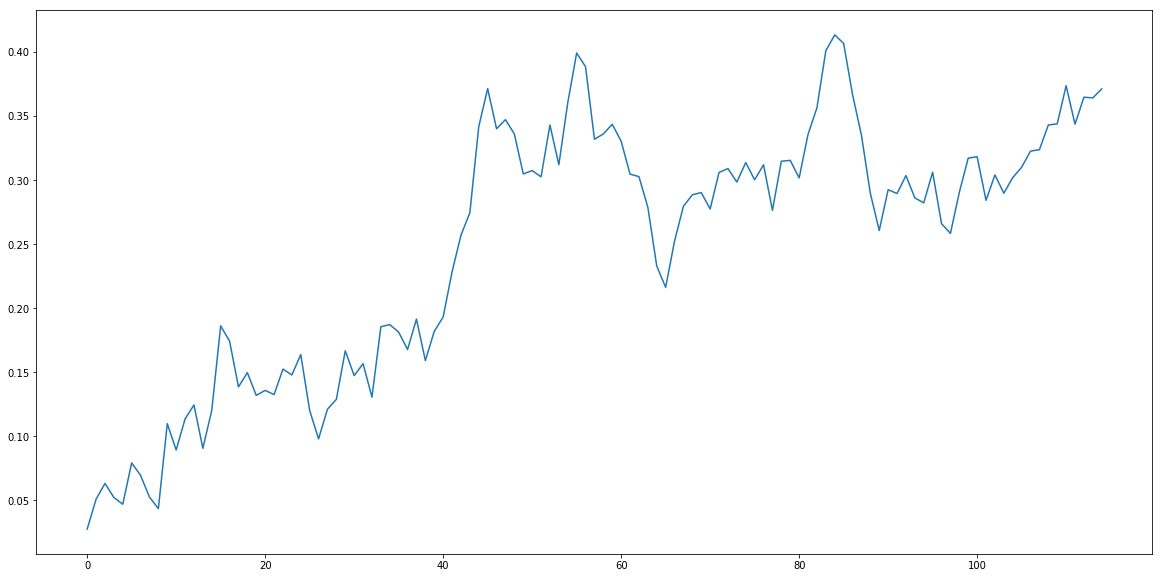

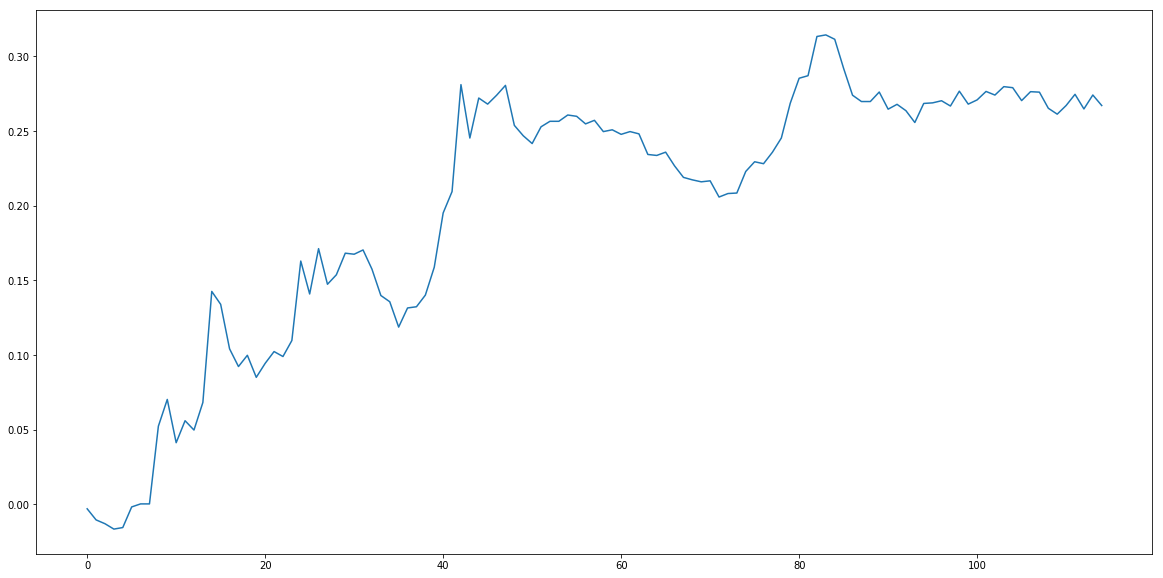

[[-0.07441327]
 [ 0.25328983]
 [-1.08328754]
 [-0.08972695]
 [-0.08069658]
 [-0.10409242]
 [-0.06739526]
 [-0.02123828]
 [-0.04074132]
 [-0.05828507]
 [-0.05074673]
 [-0.01274055]
 [ 0.26153606]
 [ 0.46240668]
 [ 0.15322796]
 [-0.31092513]
 [ 0.27009243]
 [ 0.10291116]
 [-0.13334817]
 [-0.12072267]
 [ 0.06034041]
 [ 0.96951516]
 [-0.13774312]
 [-0.17503234]
 [-0.0353441 ]
 [ 0.06315982]]


In [6]:
prepare_data_and_plot(df_20_50, "", learn_rate=1e-40, stop_rate=1e-40)